In [151]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [152]:
training = pd.read_csv("train.csv")
testing  = pd.read_csv("test.csv")

In [153]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [155]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [156]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print ("Numerical features list:")
print (num_values)

Numerical features list:
Age     float64
Fare    float64
dtype: object


In [157]:
training.describe()  
# Some are missing ages, only numerical features shows statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
def feature_null_count(data_in, data_in_name = "Input Data"):
    print (data_in_name + " null statistics:")
    print (pd.isnull(data_in).sum())
    print (" ")

In [159]:
feature_null_count(training, "Training")
feature_null_count(testing, "Testing")

Training null statistics:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing null statistics:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
 


In [160]:
training.drop(labels= ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels= ["Cabin", "Ticket"], axis = 1, inplace = True)

In [161]:
feature_null_count(training)
feature_null_count(testing)

Input Data null statistics:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Input Data null statistics:
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64
 


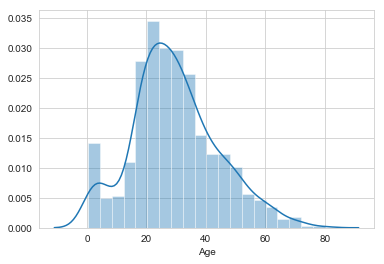

In [162]:
# Investigate age distribution to find replacement of NaN
tmp_training = training.copy()
tmp_training.dropna(inplace = True)

sns.distplot(tmp_training["Age"])
#tmp_training.head()
#tmp_training["Age"].hist(bins = 15)

#sns.distplot(tmp_training["Fare"])

In [163]:
# Filling age na with median might not be the best solution ...
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True)

testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

print( training["Embarked"].value_counts() )
# now replace missing 2 with most common case
training["Embarked"].fillna("S", inplace = True)



S    644
C    168
Q     77
Name: Embarked, dtype: int64


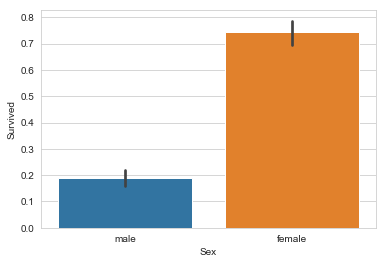

In [164]:
sns.barplot(x = "Sex", y = "Survived", data = training)

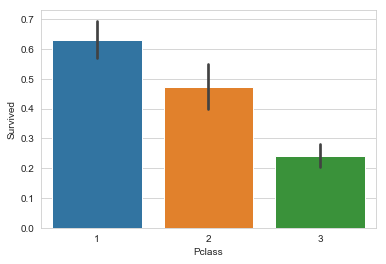

In [165]:
sns.barplot(x = "Pclass", y = "Survived", data = training)
total_survived_P1 = training[training["Pclass"] == 1]["Survived"].sum()
total_survived_P2 = training[training["Pclass"] == 2]["Survived"].sum()
total_survived_P3 = training[training["Pclass"] == 3]["Survived"].sum()
total_survived = total_survived_P1 + total_survived_P2 + total_survived_P3

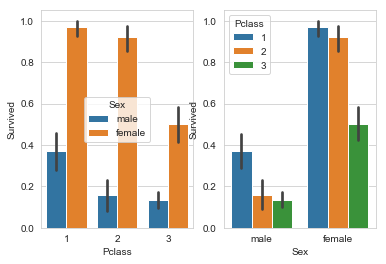

In [166]:
plt.subplot(1,2,1)
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = training)
plt.subplot(1,2,2)
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = training)

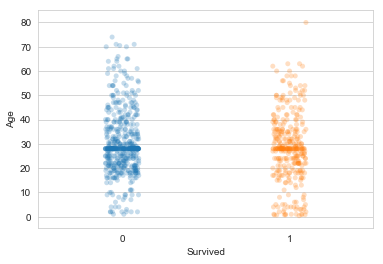

In [167]:
# added mean as NaN is quite obvious
sns.stripplot(x = "Survived", y = "Age", data = training, alpha = 0.25)

In [168]:
#sns.pairplot(training)

In [169]:
# One hot coding of categorical Sex and Embarked features
print( training["Sex"].value_counts() )
print( testing["Sex"].value_counts() )
print( training["Embarked"].value_counts() )
print( testing["Embarked"].value_counts() )

male      577
female    314
Name: Sex, dtype: int64
male      266
female    152
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [170]:
from sklearn.preprocessing import LabelEncoder

def LabelEncoder_feature(data, *le_vec):
    le_feature = LabelEncoder()
    for le_str in le_vec:
        data[le_str] = le_feature.fit_transform(data[le_str])

LabelEncoder_feature(training, "Sex", "Embarked")
LabelEncoder_feature(testing, "Sex", "Embarked")

print( training["Sex"].value_counts() )
print( testing["Sex"].value_counts() )
print( training["Embarked"].value_counts() )
print( testing["Embarked"].value_counts() )

1    577
0    314
Name: Sex, dtype: int64
1    266
0    152
Name: Sex, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64
2    270
0    102
1     46
Name: Embarked, dtype: int64


In [171]:
# Synthetic new feature: family size
training["FamlySize"] = training["SibSp"] + training["Parch"] + 1
testing["FamlySize"] = testing["SibSp"] + testing["Parch"] + 1

In [172]:
# Synthetic new feature: IsAlone
training["IsAlone"] = training["FamlySize"].apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing["FamlySize"].apply(lambda x: 1 if x == 1 else 0)

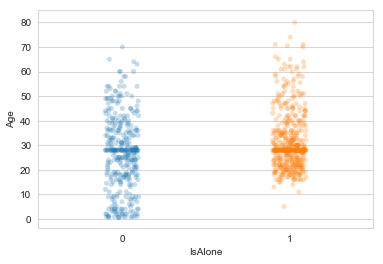

In [173]:
sns.stripplot(x = "IsAlone", y = "Age", data = training, alpha = 0.25)

In [174]:
# Synthetic new feature: Title (Find something like Mr. Mrs., Ms)
for name in training["Name"]:
    # this is a Pandas function
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.", expand = True)
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.", expand = True)
    

In [175]:
# Display extracted 
# print (training[["Name", "Title"]])
# print(training["Title"].head())

print(training["Title"].value_counts())
print(testing["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Jonkheer      1
Don           1
Capt          1
Lady          1
Sir           1
Ms            1
Mme           1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64


In [176]:
# Replace unwanted titles
title_replace_ = set(training["Title"])
title_replace__ = set(testing["Title"])
title_replace_.union(title_replace__)
title_valid = ["Mr", "Mrs", "Miss", "Master", "Dr", "Sir", "Rev"]
title_replacement = {}
for title_ in title_replace_:
    if title_ not in title_valid:
        title_replacement[title_] = "Other"

# # Replace only needed ones
# title_replacement = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
#           "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}
    
print ("Replacement list: \n", title_replacement)
training.replace({"Title": title_replacement}, inplace = True)
testing.replace({"Title": title_replacement}, inplace = True)

Replacement list: 
 {'Don': 'Other', 'Capt': 'Other', 'Col': 'Other', 'Mlle': 'Other', 'Mme': 'Other', 'Countess': 'Other', 'Ms': 'Other', 'Major': 'Other', 'Lady': 'Other', 'Jonkheer': 'Other'}


In [178]:
print(training["Title"].value_counts())
print(testing["Title"].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Other      13
Dr          7
Rev         6
Sir         1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Other       3
Rev         2
Dona        1
Dr          1
Name: Title, dtype: int64


In [179]:
LabelEncoder_feature(training, "Title")
LabelEncoder_feature(testing, "Title")

In [181]:
print(training["Title"].value_counts())
print(testing["Title"].value_counts())

3    517
2    182
4    125
1     40
5     13
0      7
6      6
7      1
Name: Title, dtype: int64
4    240
3     78
5     72
2     21
6      3
7      2
1      1
0      1
Name: Title, dtype: int64


In [182]:
training.drop(labels = ["Name"], axis = 1, inplace= True)
testing.drop(labels = ["Name"], axis = 1, inplace= True)

In [184]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamlySize,IsAlone,Title
144,145,0,2,1,18.0,0,0,11.5000,2,1,1,3
615,616,1,2,0,24.0,1,2,65.0000,2,4,0,2
785,786,0,3,1,25.0,0,0,7.2500,2,1,1,3
519,520,0,3,1,32.0,0,0,7.8958,2,1,1,3
543,544,1,2,1,32.0,1,0,26.0000,2,2,0,3


In [185]:
from sklearn.preprocessing import StandardScaler

scalar_age  = StandardScaler()
scalar_fare = StandardScaler()

scalar_age.fit( np.array(training["Age"]).reshape(-1,1) )
scalar_fare.fit( np.array(training["Fare"]).reshape(-1,1) )

StandardScaler(copy=True, with_mean=True, with_std=True)

In [190]:
training["Age"] = scalar_age.fit_transform(np.array(training["Age"]).reshape(-1,1))
training["Fare"] = scalar_fare.fit_transform(np.array(training["Fare"]).reshape(-1,1))

# Use training scalar to scale testing samplings
testing["Age"] = scalar_age.fit_transform(np.array(testing["Age"]).reshape(-1,1))
testing["Fare"] = scalar_fare.fit_transform(np.array(testing["Fare"]).reshape(-1,1))

In [191]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamlySize,IsAlone,Title
0,1,0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,2,1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,1,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,4,1,1,0,0.433312,1,0,0.420730,2,2,0,4
4,5,0,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [192]:
# Now starts to fit
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [193]:
from sklearn.metrics import make_scorer, accuracy_score

In [194]:
from sklearn.model_selection import GridSearchCV

In [198]:
X_train = training.drop(labels = ["PassengerId", "Survived"], axis = 1)
y_train = training["Survived"]

X_test = testing.drop(labels = ["PassengerId"], axis = 1)

X_train.head()
# y_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamlySize,IsAlone,Title
0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,1,0,0.433312,1,0,0.420730,2,2,0,4
4,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [199]:
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

In [348]:
# SVC model
svc_clf = SVC()
parameters_svc = {"kernel": ["rbf", "linear"], "probability":[True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

pred_svc_train = svc_clf.predict(X_training)
acc_svc_train = accuracy_score(y_training, pred_svc_train)


print ("The Score for SVC train: " + str(acc_svc_train))
print ("The Score for SVC validate: " + str(acc_svc))
print (svc_clf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

The Score for SVC train: 0.8370786516853933
The Score for SVC validate: 0.8379888268156425
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [349]:
# Random Forrest
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators"     : [4, 5, 6, 7, 8, 9, 10, 15, 20], \
                     "criterion"    : ["gini", "entropy"],\
                    "max_features" : ["auto", "sqrt", "log2"],\
                    "max_depth"    : [2, 3, 35, 10],\
                    "min_samples_split" : [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [179, 712]

In [351]:
rf_clf = grid_rf.best_estimator_
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

pred_rf_train = rf_clf.predict(X_training)
acc_rf_train = accuracy_score(y_training, pred_rf_train)

print ("The Score for RF training: " + str(acc_rf_train))
print ("The Score for RF Validation: " + str(acc_rf))
print (rf_clf)

The Score for RF training: 0.8398876404494382
The Score for RF Validation: 0.7877094972067039
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [364]:
#RandomForrest Regressor

from sklearn import ensemble
from sklearn.metrics import mean_squared_error

mseRcd = []

# tweakable parameters
nTreesList = range(20, 100, 10)
maxFeat = None
depth = 4

for iTree in nTreesList:
    rf_reg = ensemble.RandomForestRegressor(n_estimators=iTree, max_depth=depth, \
                                     max_features=maxFeat,\
                                     oob_score=False, random_state=531)
    rf_reg.fit(X_training, y_training)
    rf_reg_pred = rf_reg.predict(X_valid)
    
    mseRcd.append(mean_squared_error(y_valid, rf_reg_pred))

# find iTrees with best mse error
iTreeBest =  nTreesList[ mseRcd.index(min(mseRcd)) ]
print ("Best tree number:", iTreeBest, " with MSE: ", min(mseRcd))
rf_reg_best = ensemble.RandomForestRegressor(n_estimators=iTreeBest, \
                                             max_depth=depth,\
                                             max_features=maxFeat,\
                                             oob_score=False, random_state=531)

rf_reg_best.fit(X_training, y_training)                         

Best tree number: 30  with MSE:  0.1287556817061145


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=531, verbose=0, warm_start=False)

MSE of Training:  0.10739805282477301
MSE of Validate:  0.1287556817061145


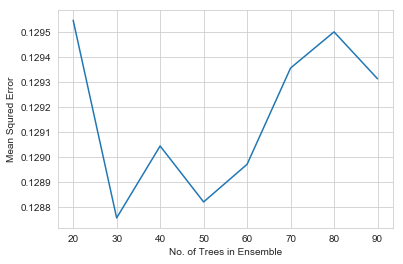

In [365]:
pred_rf_best = rf_reg_best.predict(X_valid)
pred_rf_best_train = rf_reg_best.predict(X_training)

print ("MSE of Training: ", mean_squared_error(y_training, pred_rf_best_train))
print ("MSE of Validate: ", mean_squared_error(y_valid, pred_rf_best))

plt.plot(nTreesList, mseRcd)
plt.xlabel("No. of Trees in Ensemble")
plt.ylabel("Mean Squred Error")
plt.show()

# submission_pred = rf_clf.predict(X_test)
# submission_data = pd.DataFrame({"PassengerId" : testing["PassengerId"], \
#                                "Survived" : submission_pred})

# print( submission_data.shape )

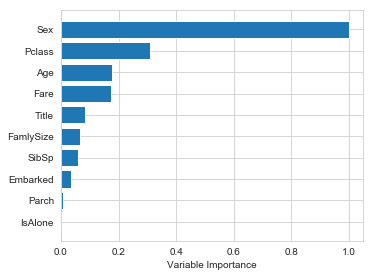

In [372]:
def display_featureImportance(dfData, featureImportance):
    featureImportance = featureImportance / featureImportance.max()
    headerNames = dfData.columns.values.tolist()
    sortedIdx = np.argsort(featureImportance)
    barPos = np.arange(sortedIdx.shape[0]) + .5    
    headerNames = np.array(headerNames)[sortedIdx]
    plt.barh(barPos, featureImportance[sortedIdx], align='center')
    plt.yticks(barPos, headerNames)
    plt.xlabel('Variable Importance')
    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
    plt.show()
    
display_featureImportance(X_training, rf_reg_best.feature_importances_)

In [373]:
import tensorflow as tf

In [413]:
# DNN using estimator
dnn_func = tf.estimator.inputs.pandas_input_fn(x = X_training, y = y_training, batch_size= 50, num_epochs= 1000, 
                                               shuffle= True)

In [414]:
# NOTE, for categorical features, need to convert to embedding cols
fc_sex = tf.feature_column.categorical_column_with_identity("Sex", num_buckets=2, default_value= 0)
fc_sex_embed = tf.feature_column.embedding_column(fc_sex, dimension= 2)

fc_Pclass = tf.feature_column.categorical_column_with_identity("Pclass", num_buckets=4, default_value= 0)
fc_Pclass_embed = tf.feature_column.embedding_column(fc_Pclass, dimension= 4)

fc_Title = tf.feature_column.categorical_column_with_identity("Title", num_buckets=8, default_value= 0)
fc_Title_embed = tf.feature_column.embedding_column(fc_Title, dimension= 8)

fc_Age = tf.feature_column.numeric_column("Age")
fc_Fare = tf.feature_column.numeric_column("Fare")


In [415]:
feat_cols = [fc_sex_embed, fc_Pclass_embed, fc_Title_embed, fc_Age, fc_Fare]

In [416]:
dnn_model = tf.estimator.DNNClassifier(hidden_units= [10, 10, 10], feature_columns= feat_cols, n_classes= 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jianwei\\AppData\\Local\\Temp\\tmpo0qovfa_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000015251F51A90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [417]:
dnn_model.train(input_fn= dnn_func, steps= 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jianwei\AppData\Local\Temp\tmpo0qovfa_\model.ckpt.
INFO:tensorflow:loss = 33.699852, step = 1
INFO:tensorflow:global_step/sec: 190.87
INFO:tensorflow:loss = 21.382528, step = 101 (0.528 sec)
INFO:tensorflow:global_step/sec: 309.914
INFO:tensorflow:loss = 15.475449, step = 201 (0.320 sec)
INFO:tensorflow:global_step/sec: 253.614
INFO:tensorflow:loss = 11.2753105, step = 301 (0.399 sec)
INFO:tensorflow:global_step/sec: 209.279
INFO:tensorflow:loss = 21.30028, step = 401 (0.474 sec)
INFO:tensorflow:global_step/sec: 224.365
INFO:tensorflow:loss = 19.365364, step = 501 (0.449 sec)
INFO:tensorflow:global_step/sec: 220.606
INFO:tensorflow:loss = 15.641172, step = 601 (0.459 sec)
INFO:tensorflow:global_step

In [418]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x= X_valid, y= y_valid, batch_size= 10, num_epochs= 1, shuffle= False)

In [419]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-15-18:24:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jianwei\AppData\Local\Temp\tmpo0qovfa_\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-15-18:24:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.79888266, accuracy_baseline = 0.55307263, auc = 0.8755682, auc_precision_recall = 0.88830876, average_loss = 0.40853307, global_step = 1000, label/mean = 0.44692737, loss = 4.0626345, precision = 0.8548387, prediction/mean = 0.39702573, recall = 0.6625
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\jianwei\AppData\Local\Temp\tmpo0qovfa_\model.ckpt-1000


{'accuracy': 0.79888266,
 'accuracy_baseline': 0.55307263,
 'auc': 0.8755682,
 'auc_precision_recall': 0.88830876,
 'average_loss': 0.40853307,
 'label/mean': 0.44692737,
 'loss': 4.0626345,
 'precision': 0.8548387,
 'prediction/mean': 0.39702573,
 'recall': 0.6625,
 'global_step': 1000}